In [1]:
### DO NOT EDIT THIS CELL!!!
### DO NOT IMPORT ANY ADDITIONAL PACKAGES

import numpy as np
import scipy
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

### PART 1

* Logistic Regression for Binary Classification using the breast cancer dataset

* We aren't going to preprocess data or split into train/test since the focus here is purely on the gradient descent algorithm

* NOTE: YOU WILL ONLY EDIT ONE CELL FOR PART-1 (SEE BELOW)

In [2]:
### DO NOT EDIT THIS CELL!!!

# read the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# feature matrix X: mxn
X = dataset.data
print ("X: ", X.shape)

# target vector y: mx1
y = dataset.target
y = y.reshape(y.shape[0], 1)
print ("y: ", y.shape)

# number of samples: m
m = X.shape[0]
print ("m: ", m)

# number of features: n
n = X.shape[1]
features = dataset.feature_names
print ("n: ",n)
print ("features: ", features)

X:  (569, 30)
y:  (569, 1)
m:  569
n:  30
features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


0.9191564147627417


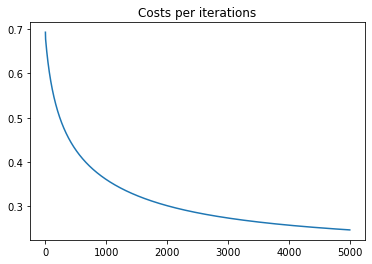

In [3]:
### THIS IS THE ONLY CELL YOU MUST EDIT FOR PART-1

# train the logistic regression model

# initialize nepochs, alpha and eps
nepochs = 5000
alpha = 2.5e-6
eps=1e-8

# initialize w and b
w = np.zeros((n,1))
b = 0

# this list will collect loss for each iteration
costs = []

# repeat for nepochs
### (1.1) YOUR CODE HERE
for i in range(nepochs):

    # forward pass (calculate current loss)
    ### (1.2) YOUR CODE HERE
    z = X@w + b
    
    yhat = scipy.special.expit(z)
    
    eps=1e-8
    yhatClipped = np.maximum(eps, np.minimum(1 - eps, yhat))
    J = (-1./m) * (y.T@np.log(yhatClipped) + (1-y.T)@np.log(1-yhatClipped))
    np.squeeze(J)
    
    # backward propagation (calculate current gradient)
    ### (1.3) YOUR CODE HERE
    dJ_dw = (1/m)*X.T@(yhat - y)
    
    dJ_db = (1/m)*np.sum((yhat-y),axis=0,keepdims=True)
    
    # gradient descent (update parameters)
    ### (1.4) YOUR CODE HERE
    w = w - alpha*dJ_dw
    
    b = b - alpha*dJ_db
    
    # append loss to costs (remember to squeeze J!)
    ### (1.5) YOUR COD HERE
    costs.append(J[0,0])

# use final parameters w and b to calcualte accuracy for training data X, y
#  - do a single forward pass for X: calcualte z, yhat
#  - set yhat to round(yhat) (that is, thresholding binary classification prediction at 0.5)
#  - calcualte accuracy_score(y, yhat) and print it
### (1.6) YOUR CODE HERE
z = X@w + b
    
yhat = scipy.special.expit(z)
    
eps=1e-8
yhatClipped = np.maximum(eps, np.minimum(1 - eps, yhat))
y_pred = yhatClipped.round()

print(accuracy_score(y,y_pred))

# plot the costs against iterations and show plot
### (1.7) YOUR CODE HERE
plt.plot(costs)
plt.title('Costs per iterations')
plt.show()

In [4]:
### DO NOT EDIT THIS CELL!!!

# compare results from your implementation to that of SGDClassifier
# your accuracy score above should match (or be very close to) what you get from here

nepochs = 5000
alpha = 2.5e-6
y = y.reshape(y.shape[0],) # to avoid warning

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', # loss function for logistic regression
                    penalty=None, alpha=0, # no regularization
                    max_iter=nepochs, tol=None, # stop based only on nepochs
                    shuffle=False, random_state=0, # don't shuffle, use random state to replicate results
                    learning_rate='constant', eta0=alpha) # constant learning rate of alpha
clf.fit(X,y)
print (round(clf.score(X,y),2))

0.92


### Part 2

* Linear Regression using the diabetes dataset 

* We aren't going to preprocess data or split into train/test since the focus here is purely on the gradient descent algorithm

* NOTE: YOU WILL ONLY EDIT ONE CELL FOR PART-2 (SEE BELOW)

In [5]:
### DO NOT EDIT THIS CELL!!!

# read the diabetes dataset from sklearn
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

# feature matrix X: mxn
X = dataset.data
print ("X: ", X.shape)

# target vector y: mx1
y = dataset.target
y = y.reshape(y.shape[0], 1)
print ("y: ", y.shape)

# number of samples: m
m = X.shape[0]
print ("m: ", m)

# number of features: n
n = X.shape[1]
features = dataset.feature_names
print ("n: ",n)
print ("features: ", features)

X:  (442, 10)
y:  (442, 1)
m:  442
n:  10
features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


2880.488150188168
0.514242147990263


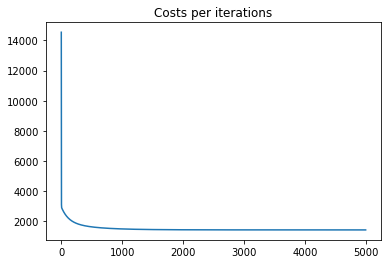

In [6]:
### THIS IS THE ONLY CELL YOU MUST EDIT FOR PART-2

# train the linear regression model

# initialize nepochs and alpha
nepochs = 5000
alpha = 0.5

# initialize w and b
w = np.zeros((n,1))
b = 0

# this list will collect loss for each iteration
costs = []

# repeat for nepochs
### (2.1) YOUR CODE HERE
for i in range(nepochs):
        
    # forward pass (calculate current loss)
    ### (2.2) YOUR CODE HERE
    z = X@w + b
    
    yhat = z
    
    J = (1./(2*m)) * (np.transpose(yhat-y)@(yhat-y))
    np.squeeze(J)
    
    # backward propagation (calculate current gradient)
    ### (2.3) YOUR CODE HERE
    dJ_dw = (1/m)*X.T@(yhat - y)
    
    dJ_db = (1/m)*np.sum((yhat-y),axis=0,keepdims=True)
    
    # gradient descent (update parameters)
    ### (2.4) YOUR CODE HERE
    w = w - alpha*dJ_dw
    
    b = b - alpha*dJ_db
    
    # append loss to costs (remember to squeeze J!)
    ### (2.5) YOUR COD HERE
    costs.append(J[0,0])

# use final parameters w and b to calcualte mse and r2 for training data X, y
#  - do a single forward pass for X: calcualte z, yhat
#  - calculate mean_squared_error(y, yhat) and print it
#  - calculate r2_score(y, yhat) and print it
### (2.6) YOUR CODE HERE
z = X@w + b
yhat = z
print(mean_squared_error(y,yhat))
print(r2_score(y,yhat))


# plot the costs against iterations and show plot
### (2.7) YOUR CODE HERE
plt.plot(costs)
plt.title('Costs per iterations')
plt.show()

In [7]:
### DO NOT EDIT THIS CELL!!!

# compare results from our implementation to that of SGDRegressor
# your mse and r2 score above should match (or be very close to) what you get from here

nepochs = 5000
alpha = 0.5
y = y.reshape(y.shape[0],) # to avoid warning

from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(loss='squared_loss', # mse for linear regression
                    penalty=None, alpha=0, # no regularization
                    max_iter=nepochs, tol=None, # stop based on only on nepochs
                    shuffle=False, random_state=0, # don't shuffle, use random state to replicate results
                    learning_rate='constant', eta0=alpha) # constant learning rate of alpha
clf.fit(X,y)
yhat = clf.predict(X)
print (round(mean_squared_error(y, yhat),2))
print (round(clf.score(X,y),2))

2922.88
0.51
